In [56]:
import numpy as np
import pandas as pd 
df1=pd.read_csv('customer_churn_dataset-testing-master.csv')
df2=pd.read_csv('customer_churn_dataset-training-master.csv')
df1

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [57]:
df2

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [58]:
df1.dtypes

CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object

In [59]:
df2.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [60]:
df1.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [61]:
df1.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [62]:
df1.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [63]:
df1.shape

(64374, 12)

In [64]:
df1.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [65]:
df1.drop_duplicates(inplace=True)

In [66]:
df1.shape

(64374, 12)

In [67]:
df1['Churn'].value_counts()

Churn
0    33881
1    30493
Name: count, dtype: int64

In [68]:
df1.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

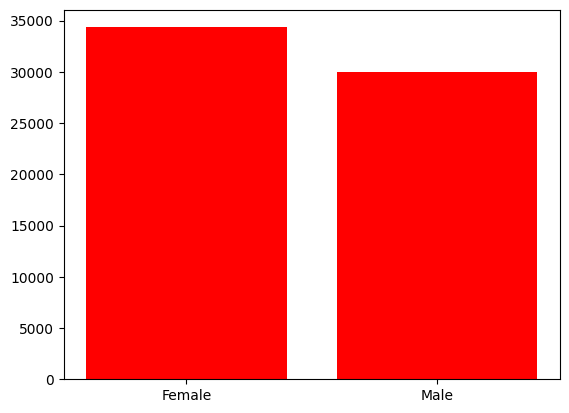

In [69]:
import matplotlib.pyplot as plt
gen=df1['Gender'].value_counts()
plt.bar(gen.index,gen.values,color='red')
plt.show()

In [70]:
df1['Subscription Type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

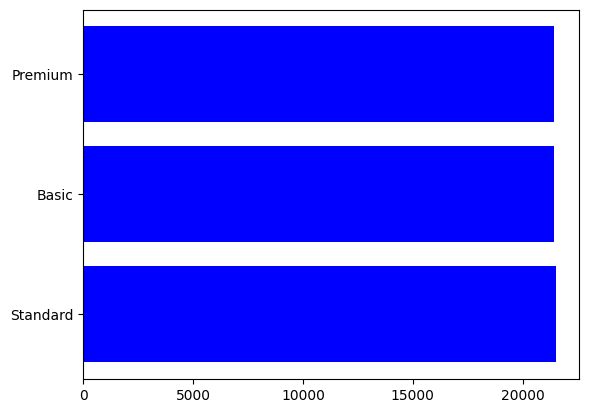

In [71]:
sub=df1['Subscription Type'].value_counts()
plt.barh(sub.index,sub.values,color='blue')
plt.show()

In [72]:
df1.dtypes

CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object

In [73]:
df1['Contract Length'].unique()

array(['Monthly', 'Annual', 'Quarterly'], dtype=object)

In [74]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
columns = [ 'Gender']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


encoded_array = encoder.fit_transform(df1[columns])
encoded_cols = encoder.get_feature_names_out(columns)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

clean_df = pd.concat([df1.drop(columns, axis=1), encoded_df], axis=1)





In [75]:
clean_df

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male
0,1,22,25,14,4,27,Basic,Monthly,598,9,1,1.0,0.0
1,2,41,28,28,7,13,Standard,Monthly,584,20,0,1.0,0.0
2,3,47,27,10,2,29,Premium,Annual,757,21,0,0.0,1.0
3,4,35,9,12,5,17,Premium,Quarterly,232,18,0,0.0,1.0
4,5,53,58,24,9,2,Standard,Annual,533,18,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,33,12,6,21,Basic,Quarterly,947,14,1,1.0,0.0
64370,64371,37,6,1,5,22,Standard,Annual,923,9,1,0.0,1.0
64371,64372,25,39,14,8,30,Premium,Monthly,327,20,1,0.0,1.0
64372,64373,50,18,19,7,22,Standard,Monthly,540,13,1,1.0,0.0


In [76]:
clean_df.drop(columns=['Last Interaction','Subscription Type','Contract Length','Age','CustomerID','Total Spend'],inplace=True)

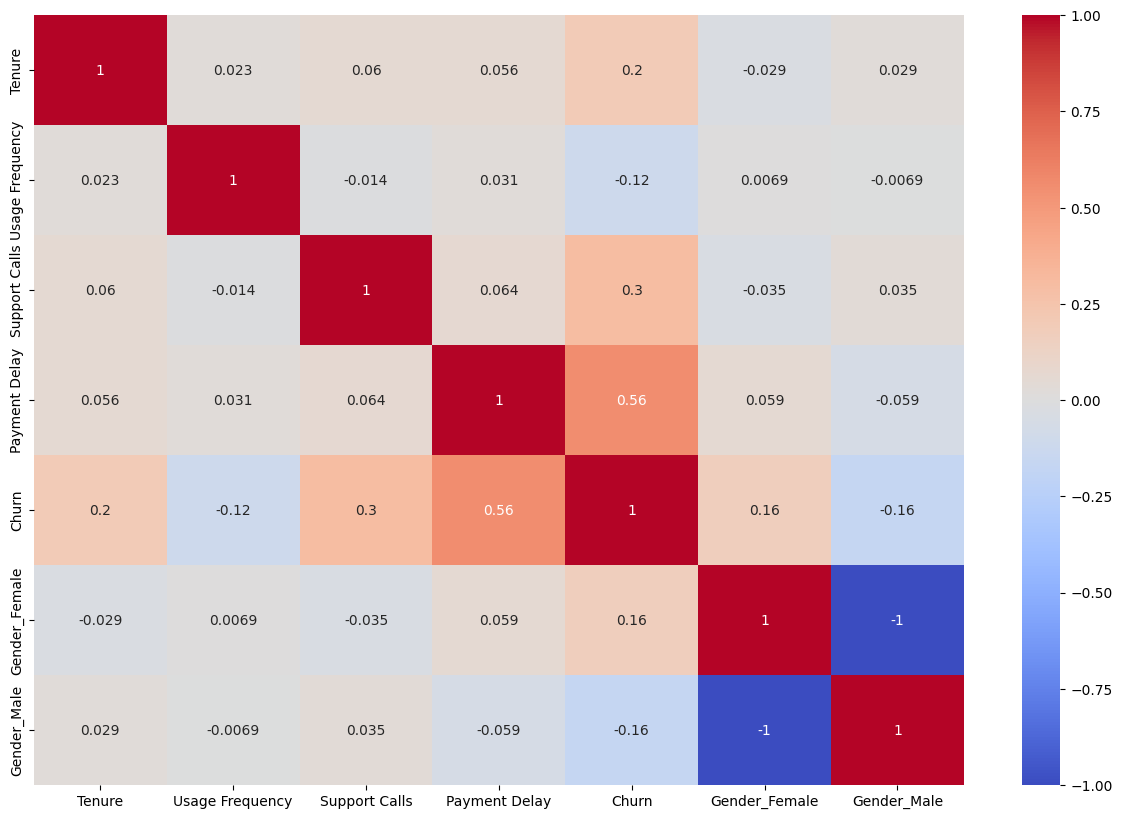

In [77]:
import seaborn as sns
plt.figure(figsize=(15,10))
corr=clean_df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

In [78]:
clean_df

,Tenure,Usage Frequency,Support Calls,Payment Delay,Churn,Gender_Female,Gender_Male
0,25,14,4,27,1,1.0,0.0
1,28,28,7,13,0,1.0,0.0
2,27,10,2,29,0,0.0,1.0
3,9,12,5,17,0,0.0,1.0
4,58,24,9,2,0,1.0,0.0
...,...,...,...,...,...,...,...
64369,33,12,6,21,1,1.0,0.0
64370,6,1,5,22,1,0.0,1.0
64371,39,14,8,30,1,0.0,1.0
64372,18,19,7,22,1,1.0,0.0


In [79]:
clean_df['Payment Delay'].unique()

array([27, 13, 29, 17,  2, 10, 28, 18,  8, 23, 21, 14, 25,  3,  6, 15,  1,
        9, 30,  4,  0, 11, 16,  7, 24, 22, 12, 26, 20, 19,  5])

In [80]:
clean_df['Usage Frequency'].unique()

array([14, 28, 10, 12, 24, 15, 11,  5,  4, 27, 23,  7, 17,  3, 30,  2, 19,
       20, 18,  8,  6, 21, 26, 16, 25, 13, 29,  9, 22,  1])

In [81]:
clean_df['Tenure'].unique()

array([25, 28, 27,  9, 58, 41, 37, 36, 20,  8, 42, 13,  2, 46, 21,  1, 54,
       40, 39, 50, 59, 60, 44, 23, 26, 31, 30, 51, 45, 19, 14, 24, 15, 47,
        3, 17, 22, 57, 34, 29, 33, 35, 56,  5, 55, 48,  6, 32, 16, 10,  7,
       43, 52, 53, 38,  4, 11, 18, 49, 12])

In [82]:
df2.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [83]:
df2.dropna(inplace=True)
df2.drop_duplicates(inplace=True)

In [84]:
df2 = df2.astype({
    'CustomerID': 'int',
    'Age': 'int',
    'Tenure': 'int',
    'Usage Frequency': 'int',
    'Support Calls': 'int',
    'Payment Delay': 'int',
    'Last Interaction': 'int',
    'Churn': 'int'
})


In [85]:

df2.dtypes

CustomerID             int64
Age                    int64
Gender                object
Tenure                 int64
Usage Frequency        int64
Support Calls          int64
Payment Delay          int64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction       int64
Churn                  int64
dtype: object

In [86]:
df2

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30,Female,39,14,5,18,Standard,Annual,932.00,17,1
1,3,65,Female,49,1,10,8,Basic,Monthly,557.00,6,1
2,4,55,Female,14,4,6,18,Basic,Quarterly,185.00,3,1
3,5,58,Male,38,21,7,7,Standard,Monthly,396.00,29,1
4,6,23,Male,32,20,5,8,Basic,Monthly,617.00,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995,42,Male,54,15,1,3,Premium,Annual,716.38,8,0
440829,449996,25,Female,8,13,1,20,Premium,Annual,745.38,2,0
440830,449997,26,Male,35,27,1,5,Standard,Quarterly,977.31,9,0
440831,449998,28,Male,55,14,2,0,Standard,Quarterly,602.55,2,0


In [87]:
df2.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [88]:
df2.drop(columns=['Last Interaction','Subscription Type','Contract Length','Age','CustomerID','Total Spend'],inplace=True)

In [89]:
df2

,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Churn
0,Female,39,14,5,18,1
1,Female,49,1,10,8,1
2,Female,14,4,6,18,1
3,Male,38,21,7,7,1
4,Male,32,20,5,8,1
...,...,...,...,...,...,...
440828,Male,54,15,1,3,0
440829,Female,8,13,1,20,0
440830,Male,35,27,1,5,0
440831,Male,55,14,2,0,0


In [90]:
clean_df['Tenure'].unique()

array([25, 28, 27,  9, 58, 41, 37, 36, 20,  8, 42, 13,  2, 46, 21,  1, 54,
       40, 39, 50, 59, 60, 44, 23, 26, 31, 30, 51, 45, 19, 14, 24, 15, 47,
        3, 17, 22, 57, 34, 29, 33, 35, 56,  5, 55, 48,  6, 32, 16, 10,  7,
       43, 52, 53, 38,  4, 11, 18, 49, 12])

In [91]:
df2.columns

Index(['Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Churn'],
      dtype='object')

In [92]:
df2['Tenure']=df2['Tenure'].replace('.0','')

In [93]:
df2['Tenure'].unique()

array([39, 49, 14, 38, 32, 33, 37, 12,  3, 18, 21, 41, 35,  4, 56, 44, 15,
       55, 43, 52, 26,  2, 29, 59, 40, 51, 53, 24, 30,  6, 28, 17, 60,  7,
       34, 10,  5, 45, 54, 58, 25, 13, 47, 31, 22, 19, 23,  1,  8, 46, 16,
       50, 48, 11, 42, 27,  9, 20, 57, 36])

In [94]:
df2

,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Churn
0,Female,39,14,5,18,1
1,Female,49,1,10,8,1
2,Female,14,4,6,18,1
3,Male,38,21,7,7,1
4,Male,32,20,5,8,1
...,...,...,...,...,...,...
440828,Male,54,15,1,3,0
440829,Female,8,13,1,20,0
440830,Male,35,27,1,5,0
440831,Male,55,14,2,0,0


In [95]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
columns = [ 'Gender']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


encoded_array = encoder.fit_transform(df2[columns])
encoded_cols = encoder.get_feature_names_out(columns)

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)

clean_df2 = pd.concat([df2.drop(columns, axis=1), encoded_df], axis=1)





In [96]:
clean_df2

,Tenure,Usage Frequency,Support Calls,Payment Delay,Churn,Gender_Female,Gender_Male
0,39.0,14.0,5.0,18.0,1.0,1.0,0.0
1,49.0,1.0,10.0,8.0,1.0,1.0,0.0
2,14.0,4.0,6.0,18.0,1.0,1.0,0.0
3,38.0,21.0,7.0,7.0,1.0,0.0,1.0
4,32.0,20.0,5.0,8.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
440829,8.0,13.0,1.0,20.0,0.0,0.0,1.0
440830,35.0,27.0,1.0,5.0,0.0,0.0,1.0
440831,55.0,14.0,2.0,0.0,0.0,0.0,1.0
440832,48.0,20.0,1.0,14.0,0.0,NaN,NaN


In [97]:
clean_df2.dropna(inplace=True)

In [98]:
clean_df2

,Tenure,Usage Frequency,Support Calls,Payment Delay,Churn,Gender_Female,Gender_Male
0,39.0,14.0,5.0,18.0,1.0,1.0,0.0
1,49.0,1.0,10.0,8.0,1.0,1.0,0.0
2,14.0,4.0,6.0,18.0,1.0,1.0,0.0
3,38.0,21.0,7.0,7.0,1.0,0.0,1.0
4,32.0,20.0,5.0,8.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
440827,6.0,25.0,2.0,15.0,0.0,0.0,1.0
440828,54.0,15.0,1.0,3.0,0.0,1.0,0.0
440829,8.0,13.0,1.0,20.0,0.0,0.0,1.0
440830,35.0,27.0,1.0,5.0,0.0,0.0,1.0


In [99]:
clean_df2.isna().sum()

Tenure             0
Usage Frequency    0
Support Calls      0
Payment Delay      0
Churn              0
Gender_Female      0
Gender_Male        0
dtype: int64

In [100]:
clean_df.columns

Index(['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Churn',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [101]:
clean_df2.columns

Index(['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Churn',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [102]:
# Training data
x_train = clean_df2.drop("Churn", axis=1)
y_train = clean_df2["Churn"]

# Testing data
x_test = clean_df.drop("Churn", axis=1)
y_test = clean_df["Churn"]


In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [104]:
x_train

array([[ 0.44876175, -0.2105094 ,  0.4545471 ,  0.60962009,  1.14591197,
        -1.14591197],
       [ 1.02828011, -1.7245599 ,  2.08309734, -0.60131773,  1.14591197,
        -1.14591197],
       [-1.00003412, -1.37516363,  0.78025715,  0.60962009,  1.14591197,
        -1.14591197],
       ...,
       [-1.34774513, -0.32697482, -0.8482931 ,  0.85180765, -0.87266738,
         0.87266738],
       [ 0.21695441,  1.30354111, -0.8482931 , -0.96459907, -0.87266738,
         0.87266738],
       [ 1.37599112, -0.2105094 , -0.52258305, -1.57006798, -0.87266738,
         0.87266738]], shape=(440831, 6))

In [105]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
# from sklearn.naive_bayes import GaussianNB
# model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.], shape=(64374,))

In [106]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
print(accuracy_score(y_test,y_pred))

0.6230621058191195


In [107]:
print(precision_score(y_test,y_pred))

0.5577822311289246


In [108]:
print(recall_score(y_test,y_pred))

0.9858000196766471


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid Search
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train
grid.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Best model
best_rf = grid.best_estimator_

# Prediction
y_pred = best_rf.predict(x_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
y_pred1

array([1., 1., 1., ..., 1., 1., 1.], shape=(64374,))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_test,y_pred1))

0.6298505607854102


In [ ]:
import pickle
# save model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)


In [ ]:
import pickle

# save model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# save scaler (IMPORTANT)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
import pickle

# save model
pickle.dump(model, open("model.pkl", "wb"))

# save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))

# save encoder
pickle.dump(encoder, open("encoder.pkl", "wb"))

# save feature column order (VERY IMPORTANT)
pickle.dump(x_train.shape[1], open("n_features.pkl", "wb"))
